### Importing packages

In [1]:
from keras.models import load_model
# from data_processing_Copy1 import encode
# from array2class import get_class_from_array

import numpy as np

import cv2
import dlib
import os
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

### Extracting faces

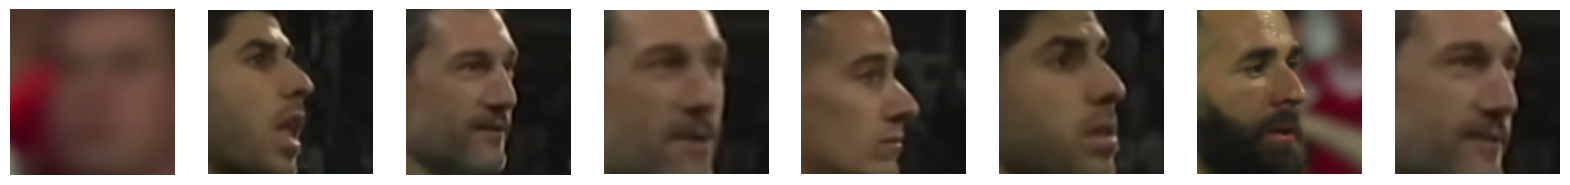

In [3]:
def extract_faces_from_video(video_path):
    face_arrays = []

    detector = dlib.get_frontal_face_detector()
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    while cap.isOpened():
        # frame_face_arrays = {}
        
            ret, frame = cap.read()
            
#             if not ret or frame is None or frame.size == 0:
#                 continue  # Skip empty frames
            try:
                blurred_frame = cv2.GaussianBlur(frame, (35, 35), 0)
            except:
                pass
            # print('blurred')

            if not ret:
                break

            gray = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2GRAY)            
            faces = detector(gray)

            for face_idx, face in enumerate(faces):
                x, y, w, h = face.left(), face.top(), face.width(), face.height()
                cropped_face = frame[y:y+h, x:x+w]

                # Convert BGR to RGB
                cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
                face_arrays.append(cropped_face_rgb)

                # frame_face_arrays[cropped_face_rgb.shape] = cropped_face_rgb

                # Move to the next second in the video
                cap.set(cv2.CAP_PROP_POS_MSEC, cap.get(cv2.CAP_PROP_POS_MSEC) + 10)

            cap.set(cv2.CAP_PROP_POS_FRAMES, cap.get(cv2.CAP_PROP_POS_FRAMES) + int(fps))

        
        # append only the biggest shape from the frame
        # biggest_shape = frame_face_arrays[max(frame_face_arrays.keys())]
        # face_arrays.append(biggest_shape)

    cap.release()
    return face_arrays

face_arrays = extract_faces_from_video('/Users/niknmirosh/code/Yassinoko/dynamic-players-insights/notebooks/improving video proc/DEMO.mov')

def display_images_in_line(face_arrays, titles=None, figsize=(20, 4)):
    num_images = len(face_arrays)

    plt.figure(figsize=figsize)

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(face_arrays[i])
        plt.axis('off')

        if titles:
            plt.title(titles[i])

    plt.show()

# Example usage:
# Assuming `image_arrays` is your array of images
display_images_in_line(face_arrays)

### Preprocess images

In [4]:
def preprocess_faces(face_arrays):
    processed_faces = []

    for face in face_arrays:
        resized_face = cv2.resize(face, (64, 64))
        resized_face = np.expand_dims(resized_face, axis=0)
        processed_faces.append(resized_face)

    return processed_faces

processed_faces = preprocess_faces(face_arrays)

### Get predictions

In [5]:
def get_predictions(processed_faces, model):
    predictions = []

    for face in processed_faces:
        prediction = model.predict(face)
        predictions.append(prediction)

    return predictions

model = load_model('/Users/niknmirosh/code/Yassinoko/dynamic-players-insights/notebooks/improving video proc/model_83_nik_Copy.h5')
result = get_predictions(processed_faces, model)

2023-11-29 14:22:02.999875: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 97ms/step


### Get classes

In [6]:
def get_class_from_array(array):

    predicted_class_index = np.argmax(array)

    unique_classes = ['alexander-arnold', 'asensio','benzema', 'carvajal',
                      'ceballos', 'courtois','henderson', 'lucas vázquez',
                      'mané', 'salah']

    return unique_classes[predicted_class_index]

for array in result:
    print(get_class_from_array(array))

henderson
asensio
lucas vázquez
lucas vázquez
lucas vázquez
asensio
benzema
lucas vázquez
